# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [74]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


In [4]:
sensor.shape

(1751, 12)

Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [5]:
# Your code here:

sensor.dropna(axis = 0, how ='any',inplace=True) 
sensor.shape

(1751, 12)

How many rows and columns are in our data?

In [6]:
# Your code here:

#1751 rows 12 columns

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [7]:
dr = pd.date_range(start= '1-1-2018 00:00:00',end = '1-1-2018 00:29:00', periods= sensor.shape[0]).strftime("%m/%d/%Y, %H:%M:%S")
dr

Index(['01/01/2018, 00:00:00', '01/01/2018, 00:00:00', '01/01/2018, 00:00:01',
       '01/01/2018, 00:00:02', '01/01/2018, 00:00:03', '01/01/2018, 00:00:04',
       '01/01/2018, 00:00:05', '01/01/2018, 00:00:06', '01/01/2018, 00:00:07',
       '01/01/2018, 00:00:08',
       ...
       '01/01/2018, 00:28:51', '01/01/2018, 00:28:52', '01/01/2018, 00:28:53',
       '01/01/2018, 00:28:54', '01/01/2018, 00:28:55', '01/01/2018, 00:28:56',
       '01/01/2018, 00:28:57', '01/01/2018, 00:28:58', '01/01/2018, 00:28:59',
       '01/01/2018, 00:29:00'],
      dtype='object', length=1751)

Assign the time series index to the dataframe's index.

In [8]:
# Your code here:
df = sensor.set_index(dr)
df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
"01/01/2018, 00:00:00",1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
"01/01/2018, 00:00:00",1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
"01/01/2018, 00:00:01",1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
"01/01/2018, 00:00:02",1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
"01/01/2018, 00:00:03",1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...
"01/01/2018, 00:28:56",1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
"01/01/2018, 00:28:57",1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
"01/01/2018, 00:28:58",1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
"01/01/2018, 00:28:59",1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [ ]:
# Your code here:
res = sm.tsa.seasonal_decompose(df['userAcceleration.x'],freq = 60)
res.plot()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

In [ ]:

res_rot = sm.tsa.seasonal_decompose(df['rotationRate.x'],period = 60)
res_rot.plot

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

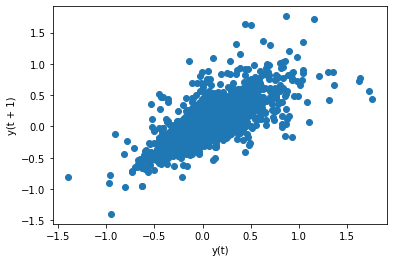

In [10]:
# Your code here:

pd.plotting.lag_plot(df["userAcceleration.x"])

Create a lag plot for `rotationRate.x`

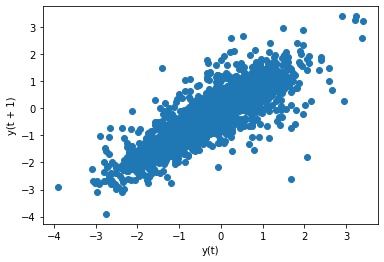

In [11]:
# Your code here:
pd.plotting.lag_plot(df["rotationRate.x"])


What are your conclusions from both visualizations?

In [64]:
# Your conclusions here:
# Parece que  el time series no es aleatorio en ninguno de los dos casos
#userAcceleration.x tiene una relationshop mas fuerte porque sus puntos están más concentrados


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [13]:
# Your code here:

stationaryCheck = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"

q = df._get_numeric_data()
print([(col,stationaryCheck(q[col])) for col in q.columns])
stationaryCheck(np.random.random(100))

[('attitude.roll', 'Stationary'), ('attitude.pitch', 'Not-Stationary'), ('attitude.yaw', 'Stationary'), ('gravity.x', 'Not-Stationary'), ('gravity.y', 'Not-Stationary'), ('gravity.z', 'Stationary'), ('rotationRate.x', 'Stationary'), ('rotationRate.y', 'Stationary'), ('rotationRate.z', 'Stationary'), ('userAcceleration.x', 'Stationary'), ('userAcceleration.y', 'Stationary'), ('userAcceleration.z', 'Stationary')]


'Stationary'

What are your conclusions from this test?

In [14]:
# Your conclusions here:



Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [66]:
train = df["userAcceleration.x"][:-10]

test = df["userAcceleration.x"][-10:]

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [68]:
data = df["userAcceleration.x"]
train = data[0:-10]# todas las filas de la columna menos las 10 ultimas
test = data[-10:] # ultimas 10 filas
model = ARMA(train, order=(2,1)) # order model is (2,1)
arma_results = model.fit()
y_pred = arma_results.predict(start=len(train),end=len(train)+len(test)-1, dynamic=False) # predecimos los valores de las ultimas 10 filas(test)
y_pred.values

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


array([0.1731485 , 0.14289567, 0.10052194, 0.07010617, 0.0560991 ,
       0.05377815, 0.05679033, 0.06064626, 0.06331584, 0.06449342])

In [51]:
x = df["userAcceleration.x"][-10:].tail(10).index
x

Index(['01/01/2018, 00:28:51', '01/01/2018, 00:28:52', '01/01/2018, 00:28:53',
       '01/01/2018, 00:28:54', '01/01/2018, 00:28:55', '01/01/2018, 00:28:56',
       '01/01/2018, 00:28:57', '01/01/2018, 00:28:58', '01/01/2018, 00:28:59',
       '01/01/2018, 00:29:00'],
      dtype='object')

In [78]:
results = pd.DataFrame({ 
    "test":test,
    "prediction":y_pred.values,
    "diff": test - y_pred.values
    })
    
results.set_index(x)

,test,prediction,diff
"01/01/2018, 00:28:51",0.149749,0.173149,-0.023400
"01/01/2018, 00:28:52",0.038461,0.142896,-0.104435
"01/01/2018, 00:28:53",-0.169175,0.100522,-0.269697
"01/01/2018, 00:28:54",-0.300361,0.070106,-0.370467
"01/01/2018, 00:28:55",-0.270174,0.056099,-0.326273
"01/01/2018, 00:28:56",-0.268367,0.053778,-0.322145
"01/01/2018, 00:28:57",-0.102444,0.056790,-0.159234
"01/01/2018, 00:28:58",-0.085590,0.060646,-0.146236
"01/01/2018, 00:28:59",-0.048105,0.063316,-0.111421
"01/01/2018, 00:29:00",-0.065011,0.064493,-0.129504


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule statsmodels.tools.eval_measures. You can read more about this function here. Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the userAcceleration.x column.

In [77]:
print("MSE = ",round(mean_squared_error(test,y_pred.values),5))
print("RMSE = ",np.sqrt(mean_squared_error(test,y_pred)))

MSE =  0.05076
RMSE =  0.22529863455816979
